<a href="https://colab.research.google.com/github/jagadish-samarla/MachineLearningPractise/blob/main/carPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Loading data and procesing

In [2]:
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [6]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#checking the disctribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding Catgorical data

In [9]:
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace = True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
print(car_dataset.Car_Name.value_counts())

city                 26
corolla altis        16
verna                14
fortuner             11
brio                 10
                     ..
Yamaha Fazer          1
Hyosung GT250R        1
Bajaj Dominar 400     1
Activa 4g             1
Honda Activa 125      1
Name: Car_Name, Length: 98, dtype: int64


Splitting data into training and testing 

In [12]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = car_dataset['Selling_Price']

In [13]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.1, random_state = 2)

1. First fitting the model into linear regression model

In [15]:
lin_model =LinearRegression()

In [16]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
 #evaluating model
 training_data_prediction = lin_model.predict(X_train)

In [18]:
#calculating r square error
error_score = metrics.r2_score(y_train, training_data_prediction)
print(error_score)

0.8799451660493711


Visualising the actual and predicted prices

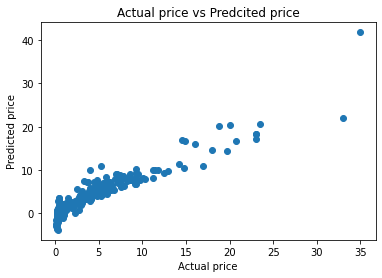

In [19]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predcited price')
plt.show()

In [20]:
test_data_prediction = lin_model.predict(X_test)
error_score1 = metrics.r2_score(y_test, test_data_prediction)
print(error_score1)

0.8365766715027051


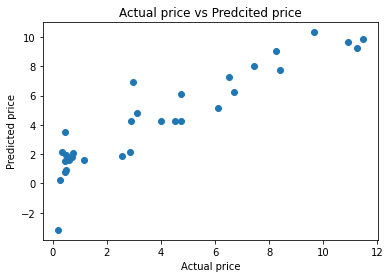

In [21]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predcited price')
plt.show()

LASSO regression

In [22]:
lass_model =Lasso()

In [23]:
lass_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
 #evaluating model
 training_data_prediction = lass_model.predict(X_train)

In [25]:
#calculating r square error
error_score = metrics.r2_score(y_train, training_data_prediction)
print(error_score)

0.8427856123435794


Visualising the actual and predicted prices

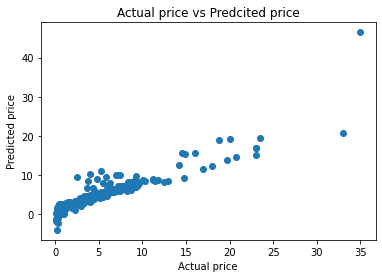

In [26]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predcited price')
plt.show()

In [27]:
test_data_prediction = lass_model.predict(X_test)
error_score1 = metrics.r2_score(y_test, test_data_prediction)
print(error_score1)

0.8709167941173195


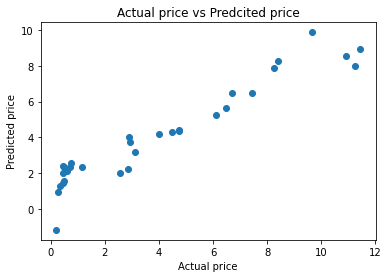

In [28]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predcited price')
plt.show()